# Coding exercises for Multivaritive Critical Points

### Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
graph_color = '#D3D3D3'

### Define the function

Below, we will define $f(x)$ and its corresponding gradient and Hessian. These will be used to implement both the gradient descent and Newton's method

In [3]:
def function(x, y):
    return (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2

def gradient(x, y):

    dx = 2*( (1.5 - x + x*y)*(y - 1) + (2.25 - x + x*y**2)*(y**2 - 1) + (2.625 - x + x*y**3)*(y**3 - 1) )
    dy = 2*( (1.5 - x + x*y)*x + 2*(2.25 - x + x*y**2)*x*y + 3*(2.625 - x + x*y**3)*x*y**2 )
    return np.array([dx, dy])

def hessian(x, y):
    d2f_dx2 = 2 - 400*y + 1200*x**2
    d2f_dxdy = -400*x
    d2f_dy2 = 200
    return np.array([[d2f_dx2, d2f_dxdy], [d2f_dxdy, d2f_dy2]])

### 1 - Plot the function

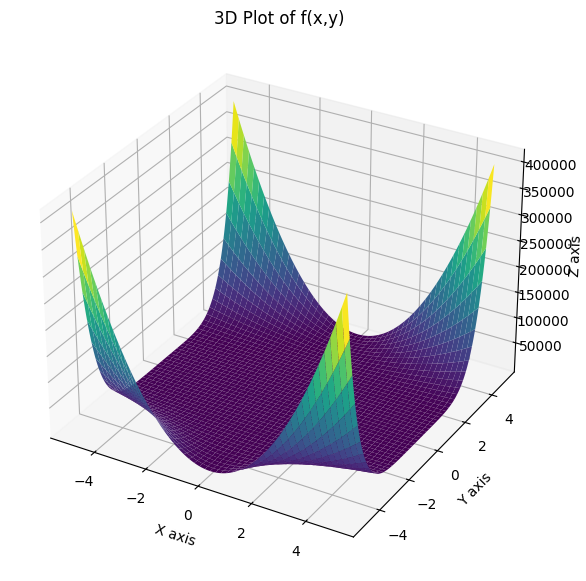

In [6]:
x = np.linspace(-5, 5, 400)
y = np.linspace(-5, 5, 400)
X, Y = np.meshgrid(x, y)
Z = function(X, Y)

# Create the 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# Adding titles and labels
ax.set_title("3D Plot of f(x,y)")
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

### 2 - Gradient Descent implementation:

Gradient Descent is a foundational algorithm used for optimization to find local minima of functions. Conceptually, it works as follows:

1. **Initialization**: Begin with an arbitrary initial point $ x_0 $.

2. **Gradient Calculation**: For each iteration, calculate the gradient of the function. Mathematically, this can be represented as:
   $$
   \nabla f(x)
   $$
   This gradient indicates the direction of the steepest ascent.

3. **Update Rule**: Modify the current point in the direction opposite to the gradient (steepest descent) by a certain magnitude, called the learning rate $ \alpha $. The update rule is:
   $$
   x_{i+1} = x_i - \alpha \nabla f(x_i)
   $$

4. **Convergence Check**: Continue the iterations until one of the following conditions is met:
    - The magnitude of consecutive gradients is smaller than a certain threshold $ \epsilon $, implying possible convergence to a local minimum.
    - A predetermined number of iterations, say $ N $, have been executed.


### 2 - Gradient Descent  - Python function :

In this code:
- `initial_point` is our starting guess \( x_0 \).
- `learning_rate` corresponds to \( \alpha \) and dictates the step size in the gradient's opposite direction.
- `max_iterations` signifies the maximum number of iterations \( N \) the algorithm should execute.
- `tol` is the threshold \( \epsilon \) under which, if the change between consecutive points is smaller, the algorithm ceases.

The function returns:
- The trajectory of points visited during the optimization.
- The found minimum (or the current estimate if terminated by `max_iterations`.
- The actual number of iterations executed.

In [4]:
def gradient_descent(initial_point=np.array([2, 1]), learning_rate=0.001, max_iterations=100000, tol=1e-6):
    """
    Gradient descent optimization.
    
    - Starts at an initial point.
    - Iteratively updates the point by moving in the direction of the steepest decrease.
    - Uses the gradient of the function to determine the direction.
    - Converges when the change between consecutive points is below a threshold or after a set number of iterations.
    
    Returns the trajectory of points visited, the found minimum, and the number of iterations.
    """
    point = initial_point
    trajectory = [point]
    
    for i in range(max_iterations):
        # Compute the gradient at current point
        grad = gradient(point[0], point[1])
        
        # Update the point using the gradient
        next_point = point - learning_rate * grad
        
        # Add the point to the trajectory
        trajectory.append(next_point)
        
        # Check for convergence: if movement is small, stop
        if np.linalg.norm(next_point - point) < tol:
            return np.array(trajectory), next_point, i+1  # Return the trajectory, min_point, and iterations
        
        point = next_point
    
    # If max_iterations were reached
    return np.array(trajectory), point, max_iterations


### 2 - Gradient Descent  - Running the function and ploting the path :

Approximate minimum point using Gradient Descent: [2.99679948 0.49920004] after 15191 iterations


Text(0.5, 0, 'Z axis')

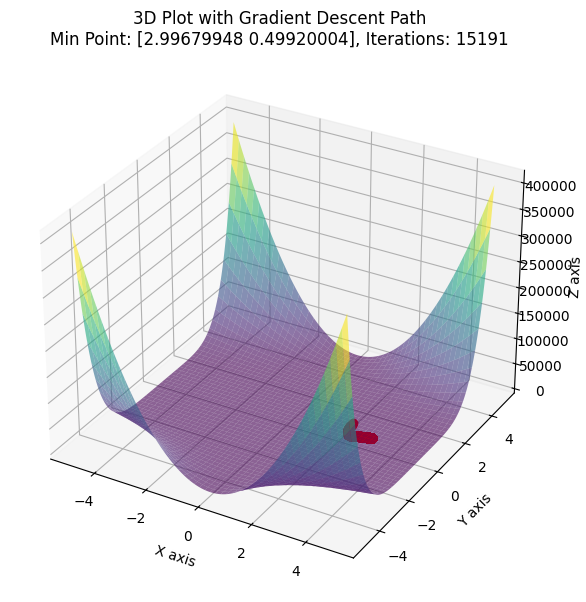

In [7]:
# Gradient Descent
trajectory, min_point, iterations_gd = gradient_descent()
print(f"Approximate minimum point using Gradient Descent: {min_point} after {iterations_gd} iterations")

# Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the function's surface
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6)

# Plot the path of gradient descent
ax.plot(trajectory[:,0], trajectory[:,1], function(trajectory[:,0], trajectory[:,1]), color='r', marker='o')

ax.set_title(f"3D Plot with Gradient Descent Path\nMin Point: {min_point}, Iterations: {iterations_gd}")
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')


### 2 - Gradient Descent  - Zoomed plot:

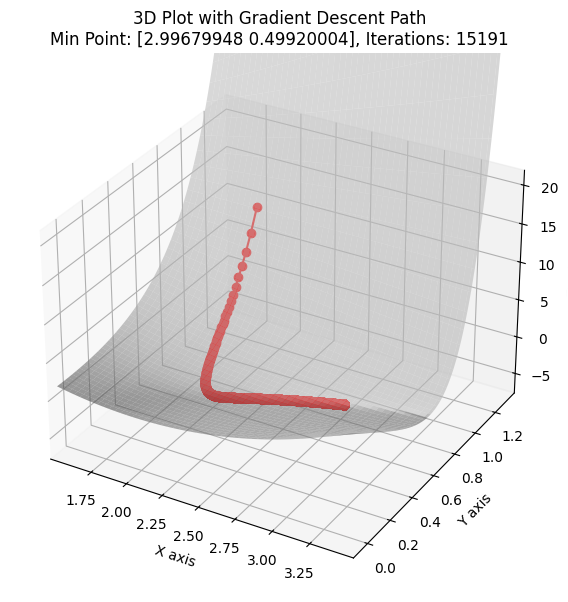

In [49]:
# Determine the range of trajectory points
x_range = [np.min(trajectory[:, 0]), np.max(trajectory[:, 0])]
y_range = [np.min(trajectory[:, 1]), np.max(trajectory[:, 1])]
z_range = [np.min(function(trajectory[:, 0], trajectory[:, 1])),
           np.max(function(trajectory[:, 0], trajectory[:, 1]))]

# Add a margin to the range
x_margin = 0.5 * (x_range[1] - x_range[0])
y_margin = 0.5 * (y_range[1] - y_range[0])
z_margin = 0.5 * (z_range[1] - z_range[0])

# Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the function's surface
x_vals = np.linspace(x_range[0] - x_margin, x_range[1] + x_margin, 100)
y_vals = np.linspace(y_range[0] - y_margin, y_range[1] + y_margin, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = function(X, Y)
ax.plot_surface(X, Y, Z, color=dark_yellow, alpha=0.6)

# Plot the path of gradient descent
ax.plot(trajectory[:, 0], trajectory[:, 1], function(trajectory[:, 0], trajectory[:, 1]), color='r', marker='o')

ax.set_title(f"3D Plot with Gradient Descent Path\nMin Point: {min_point}, Iterations: {iterations_gd}")
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# Set axis limits
ax.set_xlim(x_range[0] - x_margin, x_range[1] + x_margin)
ax.set_ylim(y_range[0] - y_margin, y_range[1] + y_margin)
ax.set_zlim(z_range[0] - z_margin, z_range[1] + z_margin)

plt.show()


### 3 - Newton's Method implementation:

The main principle behind Newton's method is iteratively improving the guess for the root or minimum by considering the function's value, its gradient, and its Hessian (second derivative or curvature) at the current guess. The method can converge faster than gradient descent, especially when the function has a quadratic nature.

The steps are as follows:

1. **Initialization**: Start with an initial guess, $x_0$.

2. **Compute Gradient and Hessian**: At each iteration, compute both the gradient and the Hessian of the function at the current point. The gradient provides the direction of steepest ascent, while the Hessian gives information about the curvature of the function.

3. **Update Rule**: Use the gradient and the inverse of the Hessian to update the current point:
   $$
   x_{i+1} = x_i - H^{-1}(x_i) \nabla f(x_i)
   $$
   Here, $ H^{-1}(x_i) $ is the inverse of the Hessian matrix at point $ x_i $, and $ \nabla f(x_i) $ is the gradient of the function at $ x_i $.

4. **Convergence Check**: Continue the iterations until one of the following criteria is met:
   - The magnitude of movement between consecutive points is smaller than a threshold $ \epsilon $.
   - A set maximum number of iterations is reached.





### 3 - Newton's Method Python function:

In the provided `newton_method` function:
- `initial_point` is our starting guess \( x_0 \).
- `max_iterations` is the pre-defined maximum number of iterations the algorithm should perform.
- `tol` is the threshold \( \epsilon \) under which, if the change between consecutive points is smaller, the method terminates.

The function returns:
- The trajectory of points visited during the optimization.
- The found minimum (or the current estimate if terminated by `max_iterations`).
- The actual number of iterations executed.

In [8]:
def newton_method(initial_point=np.array([2, 1]), max_iterations=100000, tol=1e-6):
    """
    Newton-Raphson optimization.
    
    Uses the gradient and the Hessian matrix to iteratively adjust the point to find the function's minimum value.
    
    Returns the trajectory of points visited, the found minimum, and the number of iterations.
    """
    point = initial_point
    trajectory = [point]
    
    for i in range(max_iterations):
        # Compute the gradient and Hessian at current point
        grad = gradient(point[0], point[1])
        hess = hessian(point[0], point[1])
        
        # Update the point using the Newton-Raphson step
        next_point = point - np.linalg.inv(hess).dot(grad)
        
        # Add the point to the trajectory
        trajectory.append(next_point)
        
        # Check for convergence: if movement is small, stop
        if np.linalg.norm(next_point - point) < tol:
            return np.array(trajectory), next_point, i+1
        
        point = next_point
    
    # If max_iterations were reached
    return np.array(trajectory), point, max_iterations


### 3 - Newton's Method  - Running the function :

In [9]:
trajectory, min_point, iterations_n = newton_method()
print(f"Approximate minimum point using  Newton's Method : {min_point} after {iterations_n} iterations")

Approximate minimum point using  Newton's Method : [2.97166051 0.49291479] after 66652 iterations


### 3 - Newton's Method  - Results comparison :

In [10]:
print(f"Gradient Descent iterations: {iterations_gd}")
print(f"Newton's Method iterations: {iterations_n}")

Gradient Descent iterations: 15191
Newton's Method iterations: 66652



Newton's method typically converges faster than Gradient Descent for many optimization problems. This is especially the case when the function being optimized is well-approximated by a quadratic function near the optimum. The reason for its swift convergence lies in its utilization of the second-order information (the Hessian or the curvature of the function) to guide its updates.

However, there are specific circumstances where Gradient Descent might appear to converge faster:

- **Ill-Conditioned Hessians**: If the Hessian matrix has condition numbers that are either too large or too small, it might adversely impact the convergence properties of Newton's method. In such cases, the direction identified by the Newton's step might not necessarily be the most optimal descent direction.

- **Computation Overhead**: For functions with many variables, inverting the Hessian matrix (or even just computing it) in Newton's method can become computationally intensive. This overhead might sometimes offset the gains from its typically faster convergence.

- **Non-Quadratic Regions**: In regions of the function that are not well-approximated by a quadratic, Gradient Descent could be more stable and robust. This is attributed to the fact that Newton's method makes a quadratic approximation to the function, and if this approximation is not accurate, it might lead to suboptimal steps.

- **Learning Rate Selection**: The convergence speed of Gradient Descent is heavily influenced by the choice of the learning rate. If tuned appropriately, Gradient Descent can exhibit rapid convergence, especially for functions that are not strictly quadratic.

When comparing the two methods, it's crucial to consider the specific nature of the function being optimized, the chosen initial conditions, and other problem-specific factors. These elements can greatly influence the relative performance of the two algorithms.


### 4 - Exploring Learning rates:

The `explore_learning_rates` function aims to investigate how different learning rates influence the convergence of the gradient descent optimization process.

**Parameters**:

- `learning_rates` (list of floats): This is a list of learning rates that the function will use to run the gradient descent algorithm. By adjusting this parameter, you can see how larger or smaller steps impact the algorithm's convergence speed and accuracy.
  
- `tol` (float): This is the convergence tolerance. The gradient descent will stop its iterations when the difference between subsequent points is smaller than this tolerance.

**Functionality**:

The function initializes two dictionaries: `trajectories` and `results`. The first one will store the path taken by the gradient descent for each learning rate, and the latter will store the final converged point and the total number of iterations taken for each learning rate.

For each learning rate provided in `learning_rates`, the function performs gradient descent and saves the trajectory and results:

- `traj`: This is the path or sequence of points visited during the gradient descent for the given learning rate.
  
- `point`: This is the final point or the minimum found by the gradient descent for the given learning rate.

- `iterations`: The number of iterations it took the gradient descent to converge or stop based on the maximum number of iterations.

**Returns**:

- `trajectories` (dict): A dictionary where the keys are the learning rates, and the values are the paths or sequences of points visited during the gradient descent.
  
- `results` (dict): A dictionary where the keys are the learning rates, and the values are tuples containing the final converged point and the number of iterations it took for convergence.

In essence, this function allows for a comparative analysis of how learning rates influence the behavior and outcome of the gradient descent optimization process.



In [11]:
def explore_learning_rates(learning_rates=[0.0001, 0.0005, 0.001, 0.01], tol=1e-6):
    """
    Explore the impact of different learning rates on the gradient descent optimization.
    
    Parameters:
        learning_rates (list): List of learning rates to explore.
        tol (float): Convergence tolerance.
        
    Returns:
        trajectories (dict): Paths taken for each learning rate.
        results (dict): Final converged point and number of iterations for each learning rate.
    """
    
    trajectories = {}
    results = {}
    
    # Loop through each learning rate and perform gradient descent
    for lr in learning_rates:
        traj, point, iterations = gradient_descent(learning_rate=lr, tol=tol)
        trajectories[lr] = traj
        results[lr] = (point, iterations)
    
    return trajectories, results


### 4 - Exploring Learning rates - Running the function:

In [12]:
trajectories, results = explore_learning_rates()
for lr, (point, iterations) in results.items():
    print(f"For learning rate {lr}, the algorithm converged to {point} in {iterations} iterations.")

For learning rate 0.0001, the algorithm converged to [2.9693789  0.49225411] in 78406 iterations.
For learning rate 0.0005, the algorithm converged to [2.99363019 0.49840568] in 25849 iterations.
For learning rate 0.001, the algorithm converged to [2.99679948 0.49920004] in 15191 iterations.
For learning rate 0.01, the algorithm converged to [2.9996793  0.49991994] in 2283 iterations.


### 4 - Exploring Learning rates - Ploting the results:

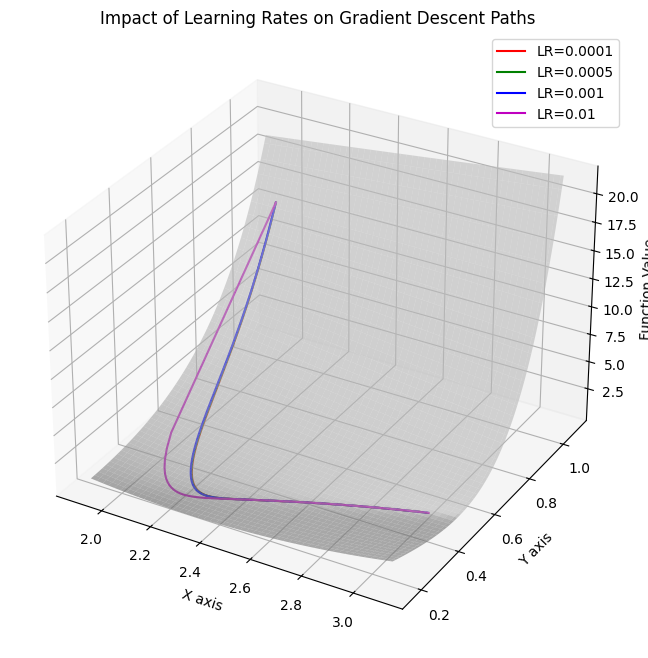

In [36]:
"""
Plot the paths taken by gradient descent for different learning rates.

Parameters:
    trajectories (dict): Paths taken for each learning rate.
"""

# Create a grid and evaluate function values
x = np.linspace(-5, 5, 400)
y = np.linspace(-5, 5, 400)
X, Y = np.meshgrid(x, y)
Z = function(X, Y)

# 3D Plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# Plot the function's surface
ax.plot_surface(X_zoomed, Y_zoomed, Z_zoomed, color=graph_color, alpha=0.6)
# Plot the paths taken by gradient descent for each learning rate
colors = ['r', 'g', 'b', 'm']
for idx, (lr, traj) in enumerate(trajectories.items()):
    xs, ys = traj[:, 0], traj[:, 1]
    zs = function(xs, ys)
    ax.plot(xs, ys, zs, color=colors[idx], label=f'LR={lr}')
    
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Function Value')
ax.legend()
ax.set_title('Impact of Learning Rates on Gradient Descent Paths')
plt.show()


## Adaptive Gradient Descent

Adaptive gradient descent is a variant of the standard gradient descent where the learning rate is reduced if the function's value doesn't decrease by a certain threshold in subsequent iterations. This method aims to dynamically adjust the learning rate based on the optimization's progress, leading to potentially faster convergence.

Given an initial learning rate, $ \alpha $,  and a decay factor, $ \delta $, if the change in function value from one iteration to the next is less than a certain threshold, the learning rate is updated as:

$$
\alpha = \alpha \cdot \delta
$$

This approach ensures that if the optimizer gets stuck or the updates are too aggressive, reducing the learning rate might help in navigating the optimization landscape more efficiently.


In [13]:
def adaptive_gradient_descent(initial_point=(2, 1), learning_rate=0.001, decay_factor=0.9, threshold=1e-3, max_iterations=100000, tol=1e-6):
    """
    Adaptive gradient descent optimization.
    
    - Starts at an initial point.
    - Iteratively updates the point by moving in the direction of the steepest decrease.
    - Uses the gradient of the function to determine the direction.
    - Adjusts the learning rate if the change in function value is below a certain threshold.
    - Converges when the change between consecutive points is below a threshold or after a set number of iterations.
    
    Returns the trajectory of points visited, the found minimum, and the number of iterations.
    """
    point = np.array(initial_point)
    trajectory = [point]
    prev_function_value = function(point[0], point[1])
    
    for i in range(max_iterations):
        # Compute the gradient at current point
        grad = gradient(point[0], point[1])
        
        # Update the point using the gradient
        next_point = point - learning_rate * grad
        new_function_value = function(next_point[0], next_point[1])
        
        # Adapt the learning rate if the change in function value is below the threshold
        if abs(new_function_value - prev_function_value) < threshold:
            learning_rate *= decay_factor
        
        # Add the point to the trajectory
        trajectory.append(next_point)
        
        # Check for convergence: if movement is small, stop
        if np.linalg.norm(next_point - point) < tol:
            return np.array(trajectory), next_point, i+1  # Return the trajectory, min_point, and iterations
        
        prev_function_value = new_function_value
        point = next_point
    
    # If max_iterations were reached
    return np.array(trajectory), point, max_iterations


In [14]:
x_init, y_init = 2, 1  # Example initialization
trajectory, min_point, iterations = adaptive_gradient_descent((x_init, y_init))
print(f"Minimum value found at x = {min_point[0]}, y = {min_point[1]} after {iterations} iterations.")

Minimum value found at x = 2.2600653420808796, y = 0.274185790274141 after 197 iterations.


Standard Gradient Descent took 15191 iterations to converge to [2.99679948 0.49920004].
Adaptive Gradient Descent took 197 iterations to converge to [2.26006534 0.27418579].


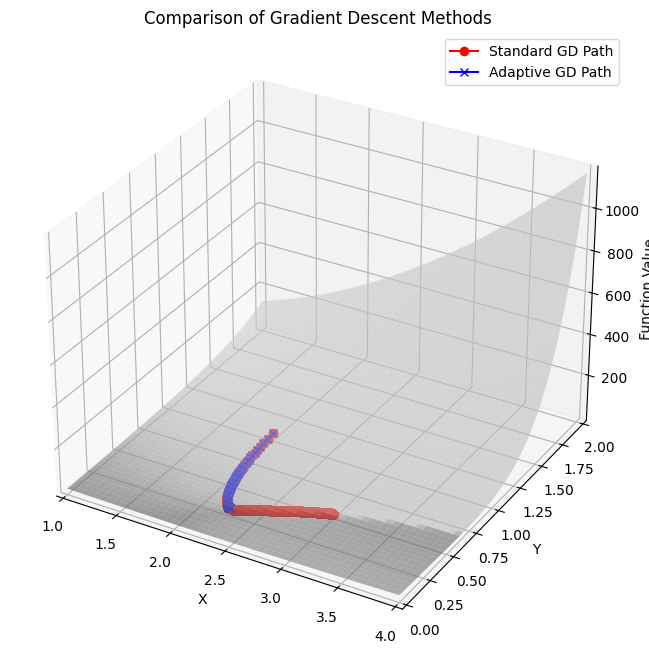

In [59]:
# Running both methods
trajectory_gd, min_point_gd, iterations_gd = gradient_descent()
trajectory_adaptive, min_point_adaptive, iterations_adaptive = adaptive_gradient_descent()

# Print comparison data
print(f"Standard Gradient Descent took {iterations_gd} iterations to converge to {min_point_gd}.")
print(f"Adaptive Gradient Descent took {iterations_adaptive} iterations to converge to {min_point_adaptive}.")

# Visualization
x = np.linspace(1, 4, 400)
y = np.linspace(0, 2, 400)
X, Y = np.meshgrid(x, y)
Z = function(X, Y)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, color = graph_color, alpha=0.6)
ax.plot(trajectory_gd[:, 0], trajectory_gd[:, 1], function(trajectory_gd[:, 0], trajectory_gd[:, 1]), color='r', marker='o', label="Standard GD Path")
ax.plot(trajectory_adaptive[:, 0], trajectory_adaptive[:, 1], function(trajectory_adaptive[:, 0], trajectory_adaptive[:, 1]), color='b', marker='x', label="Adaptive GD Path")

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Function Value')
ax.set_title('Comparison of Gradient Descent Methods')
ax.legend()

# Setting axis limits to zoom around the paths
ax.set_xlim([1, 4])
ax.set_ylim([0, 2])

plt.show()

## Gradient Descent Methods Comparison

Given the results:

- **Standard Gradient Descent**: Converged in 15,191 iterations to approximately the point (2.9968, 0.4992).
- **Adaptive Gradient Descent**: Converged in 197 iterations to approximately the point (2.2601, 0.2742).

## Conclusions:

1. **Efficiency**: The adaptive gradient descent is significantly more efficient in terms of iteration count, converging with nearly 1.3% of the iterations taken by the standard gradient descent.

2. **Convergence Point**: While the adaptive gradient descent converges much faster, it seems to settle at a different point than the standard gradient descent. This might suggest that while it's faster, it could potentially get trapped in local minima or not reach as close to the true global minimum as the standard method in certain scenarios.

3. **Learning Rate Adaptability**: The rapid convergence of the adaptive method emphasizes the importance of adaptively adjusting the learning rate during the optimization process. By dynamically decreasing the learning rate when progress stalls, the algorithm can effectively navigate the optimization landscape without getting stuck or oscillating.

4. **Trade-off**: There's a trade-off between speed of convergence and accuracy of the final solution. While adaptive gradient descent reaches a "good enough" solution very quickly, the standard gradient descent, given enough iterations, might get closer to the actual global minimum.

5. **Application Dependence**: The best method to use may depend on the specific application. If you need a quick solution that's "good enough", adaptive gradient descent might be preferable. However, if you require a more precise solution and are willing to wait longer, standard gradient descent might be more suitable.

6. **Function Complexity**: The efficiency and performance of optimization algorithms can vary depending on the complexity and nature of the function being optimized. While in this scenario adaptive gradient descent performed impressively, it's crucial to test these algorithms on a variety of functions before drawing broader conclusions about their general performance.

